# EXPERIMENT SETUP #2 - Tokenizer
The bert tokenizer is another variable in the pipeline, we can set the size of each token generated by the tokenizer and conventinal wisdom suggests the bigger the token size the more information can be packed in the token.

From [this](https://www.reddit.com/r/MachineLearning/comments/genjvb/d_why_is_the_maximum_input_sequence_length_of/) reddit thread its is understood how the complexity increases with the token size

This experiment tries to push to the maximum limit of what can be done with the resources available to get the most out of the model.

## Load Data

In [6]:
!pip install transformers nltk

In [5]:
import pandas as pd
%matplotlib inline
import numpy as np
import tensorflow as tf
from google.colab import drive
import os
import bert
import trainer
import utils
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import json

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

In [7]:
drive.mount('/gdrive')
os.listdir('/gdrive/MyDrive/data')

Mounted at /gdrive


['train.csv',
 'saved_models',
 'tokenizer_exp',
 'val.csv',
 'data.csv',
 'model_exp']

In [8]:
dataset_location = '/gdrive/MyDrive/data'
path = "/gdrive/MyDrive/data/tokenizer_exp"
use_tpu = True
train = True

In [9]:
if not os.path.exists(path):
    os.mkdir(path)

In [10]:
dataset = pd.read_csv("{}/data.csv".format(dataset_location))
validation_dataset = pd.read_csv("{}/val.csv".format(dataset_location))

In [11]:
dataset.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,10,$\mathcal{R}_{0}$ fails to predict the outbrea...,Time varying susceptibility of host at indiv...,0,0,0,0,1,0
1,21,Deciphering noise amplification and reduction ...,The impact of random fluctuations on the dyn...,0,0,0,0,1,0
2,34,An Unsupervised Homogenization Pipeline for Cl...,Electronic health records (EHR) contain a la...,0,0,0,0,1,0
3,42,Are multi-factor Gaussian term structure model...,"In this paper, we empirically study models f...",0,0,0,0,0,1
4,56,Competing evolutionary paths in growing popula...,Investigating the emergence of a particular ...,0,0,0,0,1,0


In [12]:
dataset["text"] = dataset["TITLE"] + " ." + dataset["ABSTRACT"]
validation_dataset["text"] = validation_dataset["TITLE"] + " ." + validation_dataset["ABSTRACT"]
dataset.head(1)

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,text
0,10,$\mathcal{R}_{0}$ fails to predict the outbrea...,Time varying susceptibility of host at indiv...,0,0,0,0,1,0,$\mathcal{R}_{0}$ fails to predict the outbrea...


In [13]:
classes = ["Computer Science", "Physics", "Mathematics", "Statistics", "Quantitative Biology", "Quantitative Finance"]

In [14]:
Y = dataset[classes].values
Y_val = validation_dataset[classes].values

In [15]:
if use_tpu:
    try:
        tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
        tf.config.experimental_connect_to_cluster(tpu)
        tf.tpu.experimental.initialize_tpu_system(tpu)
        strategy = tf.distribute.experimental.TPUStrategy(tpu)
    except ValueError:
        strategy = tf.distribute.get_strategy() # for CPU and single GPU
        print('Number of replicas:', strategy.num_replicas_in_sync)

INFO:absl:Entering into master device scope: /job:worker/replica:0/task:0/device:CPU:0


INFO:tensorflow:Initializing the TPU system: grpc://10.7.251.98:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.7.251.98:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


## Train

In [16]:
class ModelConfig:
    max_length = 100
    bert_name = "bert-base-uncased"
    num_labels = 6
    optimizer = tf.keras.optimizers.Adam(0.00001)
    loss_function = "binary_crossentropy"
    metrics = ["accuracy"]


class TrainerConfig:
    test_size = 0.2
    fold_count = 8
    batch_size = 64
    epochs = 10

In [13]:
processors = [utils.replace_latex_math_with, utils.to_corpus, utils.lemmatize_sentence]
ModelConfig.max_length = 50
version = "model_50"
if use_tpu:
    with strategy.scope():
        model = bert.SimpleBertForSequenceClassification(config=ModelConfig)
        model.version = version
        model.build(processors=processors)
else:
    model = bert.SimpleBertForSequenceClassification(config=ModelConfig)
    model.version = version
    model.build(processors=processors)
if train:
    trainer_methodology = trainer.TestTrainSplitTrainer(config=TrainerConfig, model=model)
    trainer_methodology.initialize(x=dataset["text"], y=Y)
    training_history_50 = trainer_methodology.train()
    training_history_50 = utils.training_history_to_dict(training_history_50)
    with open(os.path.join(path, "training_results_{}.json".format(model.name())), "w") as file:
        json.dump(training_history_50, file)
    model.save(path)
else:
    model.load(path)
    with open(os.path.join(path, "training_results_{}.json".format(model.name())), "w") as file:
        training_history_50 = json.load(file) 

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


250/250 [==============================] - ETA: 0s - loss: 0.9543 - accuracy: 0.4560WARNING:tensorflow:The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).


250/250 [==============================] - 195s 301ms/step - loss: 0.9531 - accuracy: 0.4565 - val_loss: 0.3377 - val_accuracy: 0.7414
Epoch 2/10
250/250 [==============================] - 22s 87ms/step - loss: 0.3819 - accuracy: 0.6998 - val_loss: 0.3479 - val_accuracy: 0.7131
Epoch 3/10
250/250 [==============================] - 22s 87ms/step - loss: 0.3767 - accuracy: 0.6151 - val_loss: 0.3819 - val_accuracy: 0.6536
Epoch 4/10
250/250 [==============================] - 22s 87ms/step - loss: 0.3432 - accuracy: 0.7185 - val_loss: 0.2918 - val_accuracy: 0.7559
Epoch 5/10
250/250 [==============================] - 22s 87ms/step - loss: 0.2937 - accuracy: 0.7632 - val_loss: 0.2850 - val_accuracy: 0.7569
Epoch 6/10
250/250 [==============================] - 22s 86ms/step - loss: 0.2830 - accuracy: 0.7530 - val_loss: 0.2830 - val_accuracy: 0.7502
Epoch 7/10
250/250 [==============================] - 22s 87ms/step - loss: 0.2839 - accuracy: 0.7444 - val_loss: 0.2804 - val_accuracy: 0.7557
E

In [14]:
processors = [utils.replace_latex_math_with, utils.to_corpus, utils.lemmatize_sentence]
ModelConfig.max_length = 100
version = "model_100"
if use_tpu:
    with strategy.scope():
        model = bert.SimpleBertForSequenceClassification(config=ModelConfig)
        model.version = version
        model.build(processors=processors)
else:
    model = bert.SimpleBertForSequenceClassification(config=ModelConfig)
    model.version = version
    model.build(processors=processors)
if train:
    trainer_methodology = trainer.TestTrainSplitTrainer(config=TrainerConfig, model=model)
    trainer_methodology.initialize(x=dataset["text"], y=Y)
    training_history_100 = trainer_methodology.train()
    training_history_100 = utils.training_history_to_dict(training_history_100)
    with open(os.path.join(path, "training_results_{}.json".format(model.name())), "w") as file:
        json.dump(training_history_100, file)
    model.save(path)
else:
    model.load(path)
    with open(os.path.join(path, "training_results_{}.json".format(model.name())), "w") as file:
        training_history_100 = json.load(file) 

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/10


250/250 [==============================] - ETA: 0s - loss: 0.4643 - accuracy: 0.6832WARNING:tensorflow:The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).


250/250 [==============================] - 158s 325ms/step - loss: 0.4641 - accuracy: 0.6831 - val_loss: 0.4159 - val_accuracy: 0.5612
Epoch 2/10
250/250 [==============================] - 25s 102ms/step - loss: 0.3696 - accuracy: 0.6491 - val_loss: 0.2818 - val_accuracy: 0.7559
Epoch 3/10
250/250 [==============================] - 26s 103ms/step - loss: 0.2687 - accuracy: 0.7620 - val_loss: 0.2323 - val_accuracy: 0.7362
Epoch 4/10
250/250 [==============================] - 25s 102ms/step - loss: 0.2307 - accuracy: 0.7622 - val_loss: 0.2698 - val_accuracy: 0.6486
Epoch 5/10
250/250 [==============================] - 26s 102ms/step - loss: 0.2483 - accuracy: 0.7216 - val_loss: 0.2260 - val_accuracy: 0.7554
Epoch 6/10
250/250 [==============================] - 26s 103ms/step - loss: 0.2217 - accuracy: 0.7827 - val_loss: 0.2350 - val_accuracy: 0.7064
Epoch 7/10
250/250 [==============================] - 26s 102ms/step - loss: 0.2527 - accuracy: 0.6649 - val_loss: 0.2255 - val_accuracy: 0.

In [15]:
processors = [utils.replace_latex_math_with, utils.to_corpus, utils.lemmatize_sentence]
ModelConfig.max_length = 200
version = "model_200"
if use_tpu:
    with strategy.scope():
        model = bert.SimpleBertForSequenceClassification(config=ModelConfig)
        model.version = version
        model.build(processors=processors)
else:
    model = bert.SimpleBertForSequenceClassification(config=ModelConfig)
    model.version = version
    model.build(processors=processors)
if train:
    trainer_methodology = trainer.TestTrainSplitTrainer(config=TrainerConfig, model=model)
    trainer_methodology.initialize(x=dataset["text"], y=Y)
    training_history_200 = trainer_methodology.train()
    training_history_200 = utils.training_history_to_dict(training_history_200)
    with open(os.path.join(path, "training_results_{}.json".format(model.name())), "w") as file:
        json.dump(training_history_200, file)
    model.save(path)
else:
    model.load(path)
    with open(os.path.join(path, "training_results_{}.json".format(model.name())), "w") as file:
        training_history_200 = json.load(file) 

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/10


250/250 [==============================] - ETA: 0s - loss: 0.5415 - accuracy: 0.6240WARNING:tensorflow:The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).


250/250 [==============================] - 167s 367ms/step - loss: 0.5408 - accuracy: 0.6243 - val_loss: 0.2820 - val_accuracy: 0.7394
Epoch 2/10
250/250 [==============================] - 34s 136ms/step - loss: 0.2906 - accuracy: 0.7397 - val_loss: 0.3063 - val_accuracy: 0.7695
Epoch 3/10
250/250 [==============================] - 34s 137ms/step - loss: 0.2869 - accuracy: 0.7879 - val_loss: 0.2772 - val_accuracy: 0.7519
Epoch 4/10
250/250 [==============================] - 34s 137ms/step - loss: 0.2587 - accuracy: 0.7656 - val_loss: 0.2591 - val_accuracy: 0.7116
Epoch 5/10
250/250 [==============================] - 34s 137ms/step - loss: 0.2362 - accuracy: 0.7741 - val_loss: 0.2631 - val_accuracy: 0.7599
Epoch 6/10
250/250 [==============================] - 34s 138ms/step - loss: 0.2270 - accuracy: 0.7648 - val_loss: 0.2535 - val_accuracy: 0.7534
Epoch 7/10
250/250 [==============================] - 34s 138ms/step - loss: 0.2976 - accuracy: 0.6250 - val_loss: 0.3146 - val_accuracy: 0.

In [16]:
processors = [utils.replace_latex_math_with, utils.to_corpus, utils.lemmatize_sentence]
ModelConfig.max_length = 512
version = "model_max"
if use_tpu:
    with strategy.scope():
        model = bert.SimpleBertForSequenceClassification(config=ModelConfig)
        model.version = version
        model.build(processors=processors)
else:
    model = bert.SimpleBertForSequenceClassification(config=ModelConfig)
    model.version = version
    model.build(processors=processors)
if train:
    trainer_methodology = trainer.TestTrainSplitTrainer(config=TrainerConfig, model=model)
    trainer_methodology.initialize(x=dataset["text"], y=Y)
    training_history_max = trainer_methodology.train()
    training_history_max = utils.training_history_to_dict(training_history_max)
    with open(os.path.join(path, "training_results_{}.json".format(model.name())), "w") as file:
        json.dump(training_history_max, file)
    model.save(path)
else:
    model.load(path)
    with open(os.path.join(path, "training_results_{}.json".format(model.name())), "w") as file:
        training_history_max = json.load(file) 

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/10


250/250 [==============================] - ETA: 0s - loss: 0.7680 - accuracy: 0.5501WARNING:tensorflow:The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).


250/250 [==============================] - 206s 502ms/step - loss: 0.7669 - accuracy: 0.5505 - val_loss: 0.2588 - val_accuracy: 0.7374
Epoch 2/10
250/250 [==============================] - 65s 259ms/step - loss: 0.3245 - accuracy: 0.7098 - val_loss: 0.4722 - val_accuracy: 0.5204
Epoch 3/10
250/250 [==============================] - 65s 260ms/step - loss: 0.3964 - accuracy: 0.6416 - val_loss: 0.3171 - val_accuracy: 0.6308
Epoch 4/10
250/250 [==============================] - 65s 260ms/step - loss: 0.3211 - accuracy: 0.7063 - val_loss: 0.2589 - val_accuracy: 0.7342
Epoch 5/10
250/250 [==============================] - 65s 260ms/step - loss: 0.2600 - accuracy: 0.7591 - val_loss: 0.2371 - val_accuracy: 0.7292
Epoch 6/10
250/250 [==============================] - 65s 260ms/step - loss: 0.3027 - accuracy: 0.7099 - val_loss: 0.3323 - val_accuracy: 0.6185
Epoch 7/10
250/250 [==============================] - 65s 260ms/step - loss: 0.3150 - accuracy: 0.6601 - val_loss: 0.2316 - val_accuracy: 0.

## Evaluation

In [17]:
exp_names = ["50 Tokens", "100 tokens", "200 tokens", "512 tokens"]

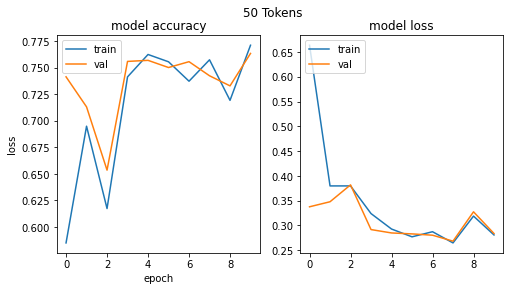

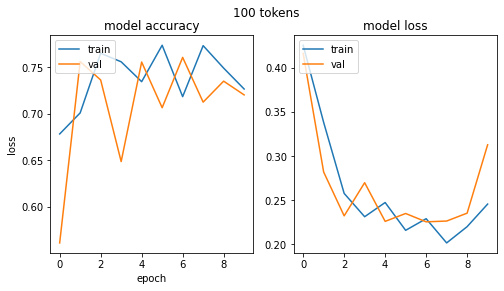

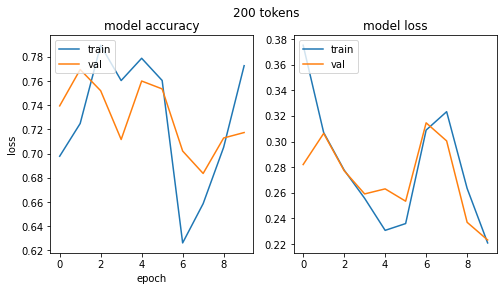

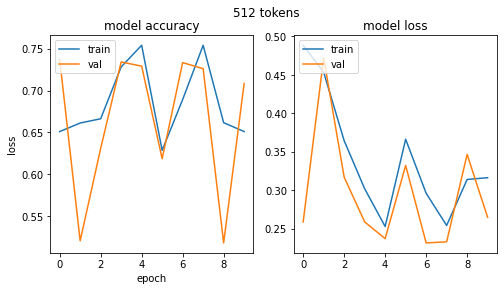

In [18]:
model = bert.SimpleBertForSequenceClassification(config=ModelConfig)
model.version = "model_50"
with open(os.path.join(path, "training_results_{}.json".format(model.name())), "r") as file:
    training_history = json.load(file)
utils.plot_training_result(training_history, exp_names[0])

model.version = "model_100"
with open(os.path.join(path, "training_results_{}.json".format(model.name())), "r") as file:
    training_history = json.load(file)
utils.plot_training_result(training_history, exp_names[1])

model.version = "model_200"
with open(os.path.join(path, "training_results_{}.json".format(model.name())), "r") as file:
    training_history = json.load(file)
utils.plot_training_result(training_history, exp_names[2])

model.version = "model_max"
with open(os.path.join(path, "training_results_{}.json".format(model.name())), "r") as file:
    training_history = json.load(file)
utils.plot_training_result(training_history, exp_names[3])

Bearing in mind the fact that multiple runs of the experiment is needed to have a solid conclusion. Due to the limits in resource and time, only 1 runs was done. The 100 token model ever so slightly go ahead of 200 and 512. This does prove that there is a point of diminishing return and it might be different for different datasets. But for this dataset it might be 200.

In [19]:
model = bert.SimpleBertForSequenceClassification(config=ModelConfig)
model.build(processors=[utils.replace_latex_math_with, utils.to_corpus, utils.lemmatize_sentence])
model.version = "model_50"
model.load(path)
model_50_y_pred = model.predict(validation_dataset["text"])

model.build(processors=[utils.replace_latex_math_with, utils.to_corpus, utils.lemmatize_sentence])
model.version = "model_100"
model.load(path)
model_100_y_pred = model.predict(validation_dataset["text"])

model.build(processors=[utils.replace_latex_math_with, utils.to_corpus, utils.lemmatize_sentence])
model.version = "model_200"
model.load(path)
model_200_y_pred = model.predict(validation_dataset["text"])

model.build(processors=[utils.replace_latex_math_with, utils.to_corpus, utils.lemmatize_sentence])
model.version = "model_max"
model.load(path)
model_max_y_pred = model.predict(validation_dataset["text"])

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model 

In [20]:
y_preds=[model_50_y_pred, model_100_y_pred, model_200_y_pred, model_max_y_pred]
Ys=[Y_val, Y_val, Y_val, Y_val]
classes=classes
threshold=0.5
model_names=exp_names

In [21]:
utils.print_f1_scores(y_preds, Ys, classes, threshold, model_names)

F1-Score for is  50 Tokens : [('Computer Science', 0.4801648634724369), ('Physics', 0.30695187165775406), ('Mathematics', 0.33617539585870887), ('Statistics', 0.41056686846450197), ('Quantitative Biology', 0.8716323296354991), ('Quantitative Finance', 0.0)]
F1-Score for is  100 tokens : [('Computer Science', 0.4533980582524272), ('Physics', 0.34212067955477443), ('Mathematics', 0.2914255654918464), ('Statistics', 0.4056706652126499), ('Quantitative Biology', 0.8922261484098939), ('Quantitative Finance', 0.9135802469135801)]
F1-Score for is  200 tokens : [('Computer Science', 0.48008277289187795), ('Physics', 0.3084311632870864), ('Mathematics', 0.2914046121593291), ('Statistics', 0.4281559045956952), ('Quantitative Biology', 0.8903878583473862), ('Quantitative Finance', 0.7126436781609194)]
F1-Score for is  512 tokens : [('Computer Science', 0.43938690199721314), ('Physics', 0.2767772511848341), ('Mathematics', 0.30093355299286106), ('Statistics', 0.44968944099378877), ('Quantitative B

In [22]:
utils.print_hamming_losses(y_preds, Ys, classes, threshold, model_names)

Hamming for 50 Tokens  :  0.44587675991954656
Hamming for 100 tokens  :  0.44340830133479614
Hamming for 200 tokens  :  0.4517279210093253
Hamming for 512 tokens  :  0.5068568294020844


Confusion matrix for 50 Tokens


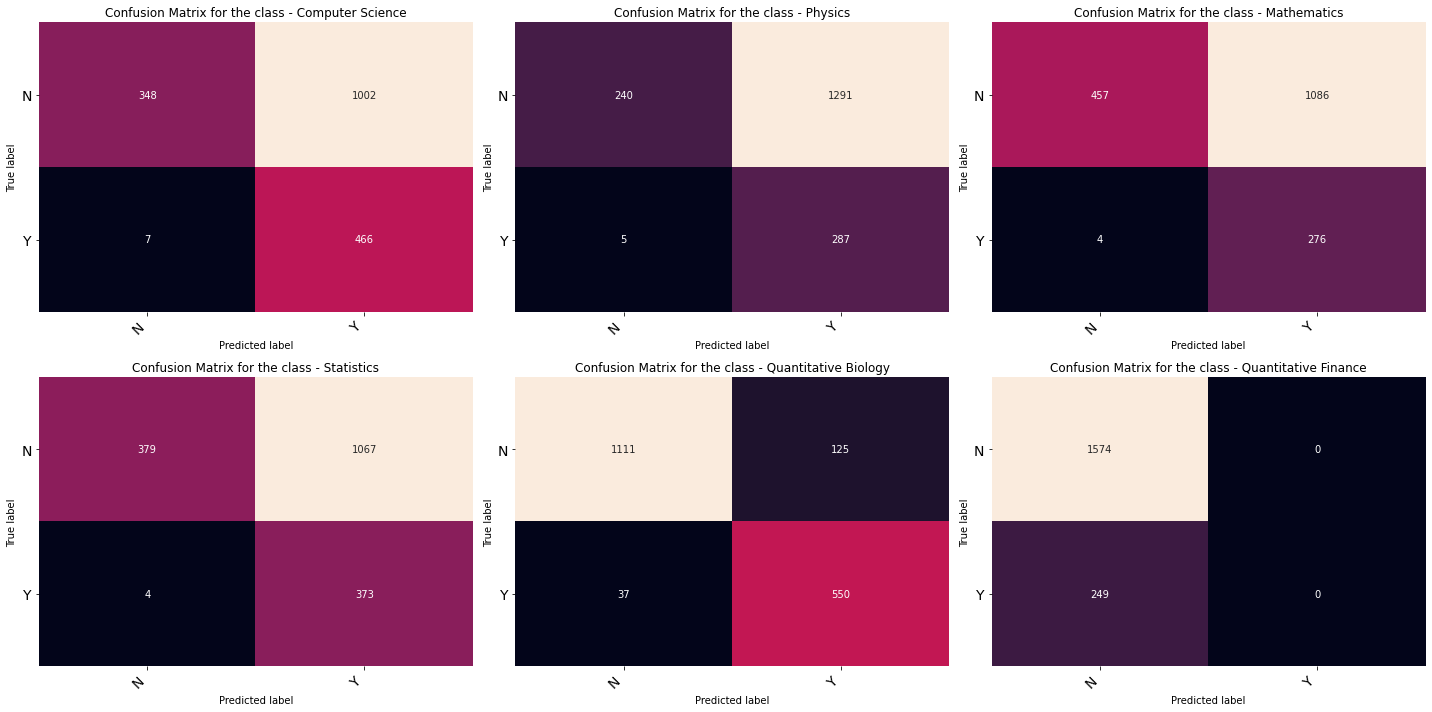

Confusion matrix for 100 tokens


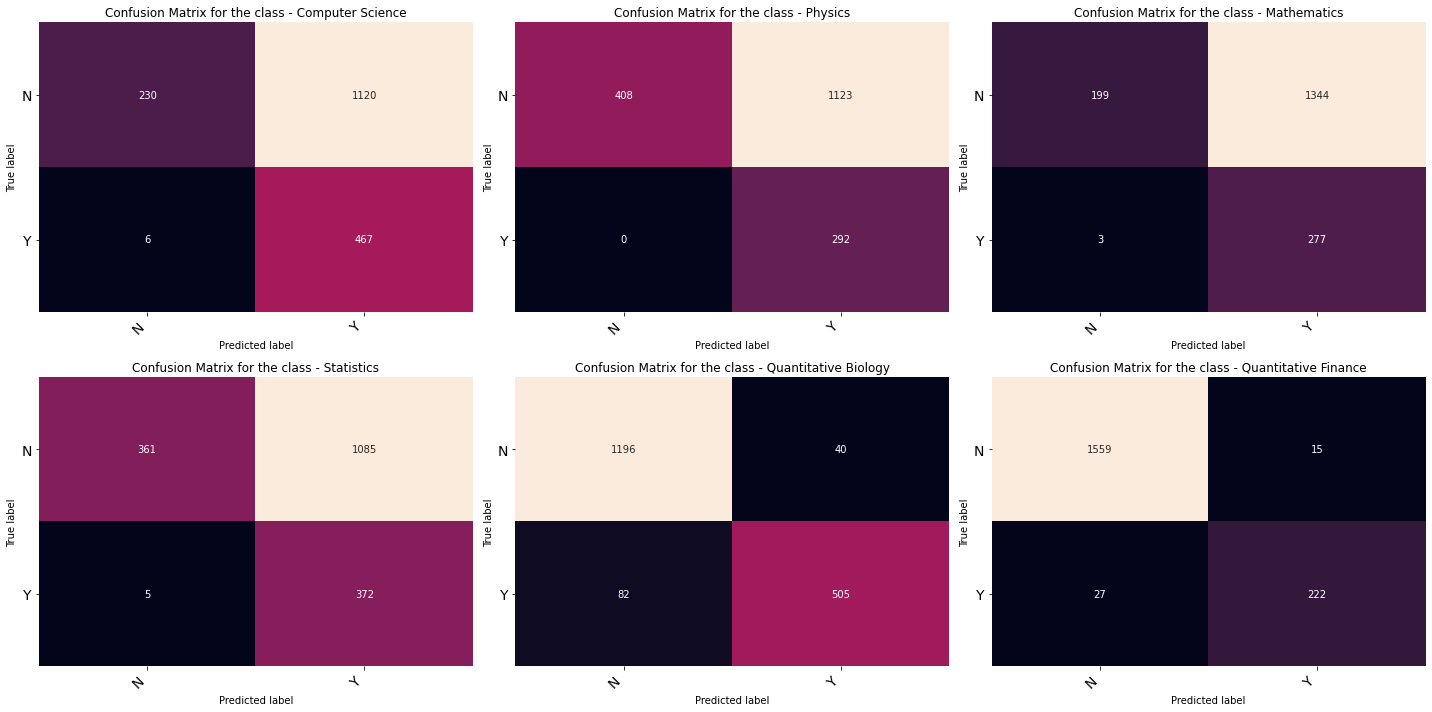

Confusion matrix for 200 tokens


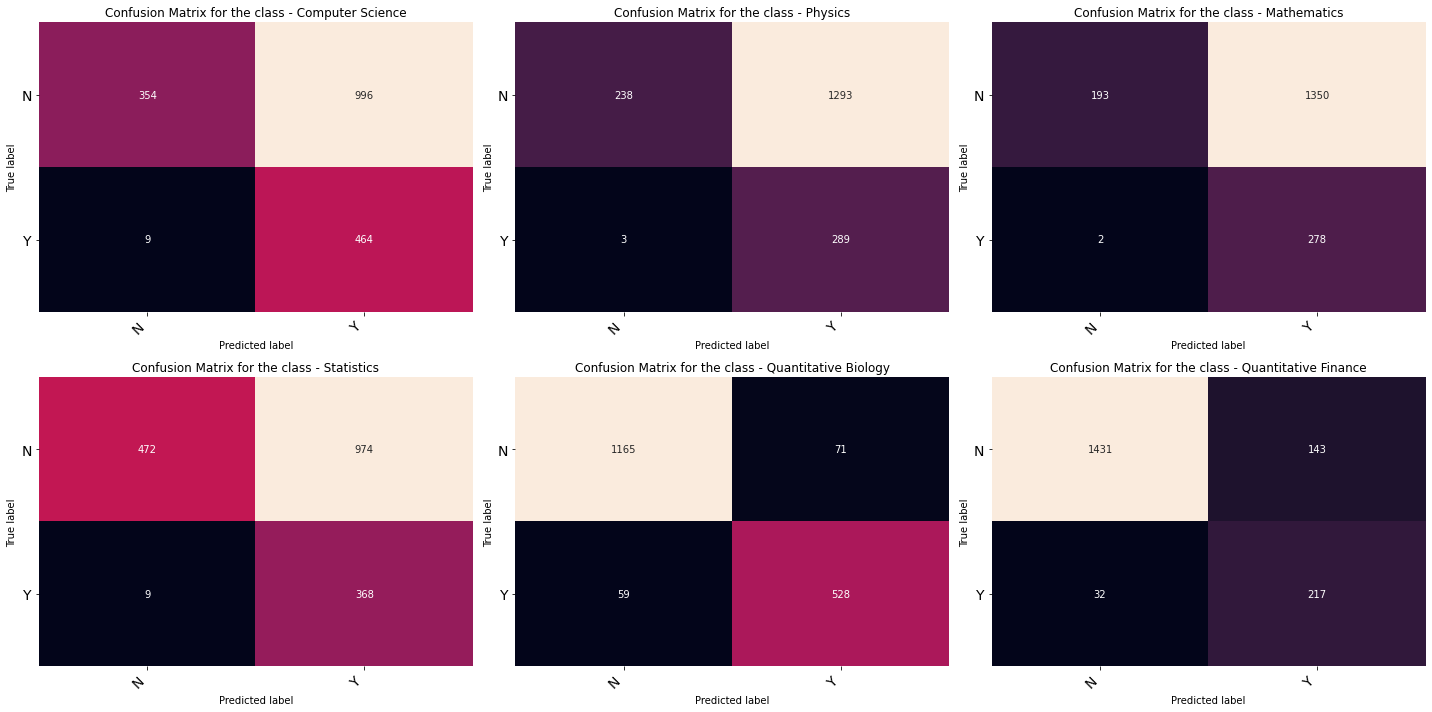

Confusion matrix for 512 tokens


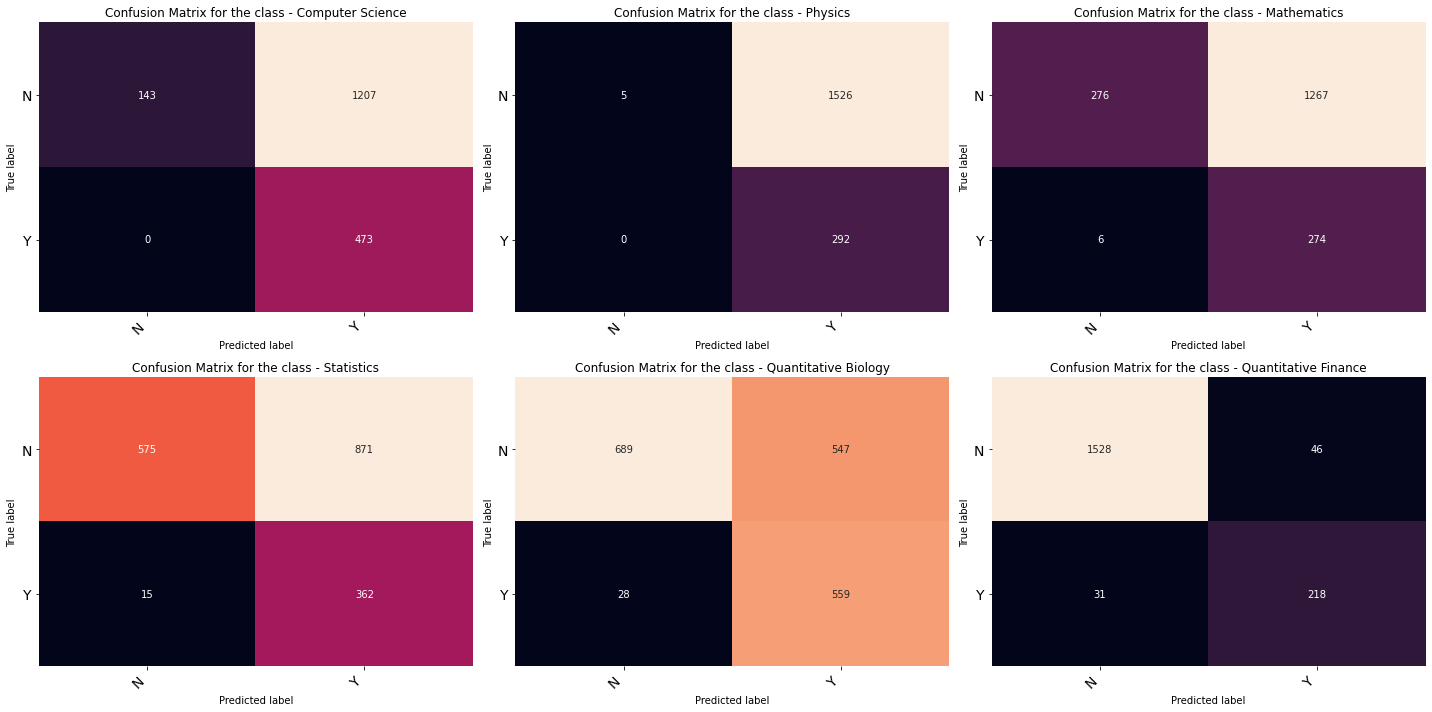

In [23]:
utils.draw_confusion_matrices(y_preds, Ys, classes, threshold, model_names)

ROC curve for 50 Tokens


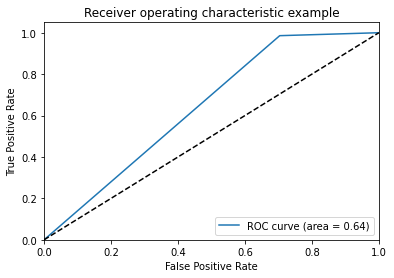

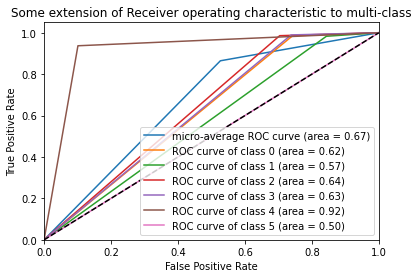

ROC curve for 100 tokens


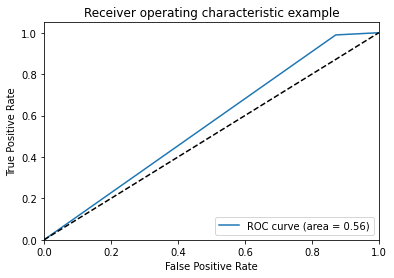

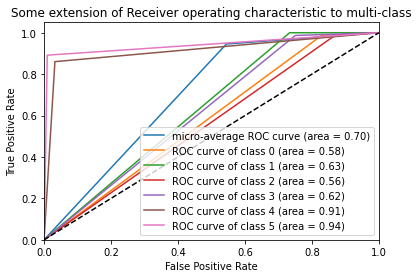

ROC curve for 200 tokens


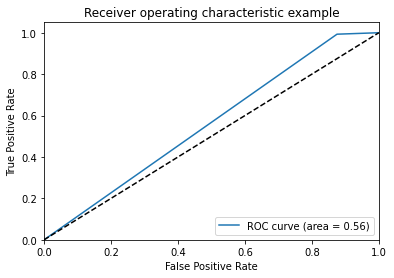

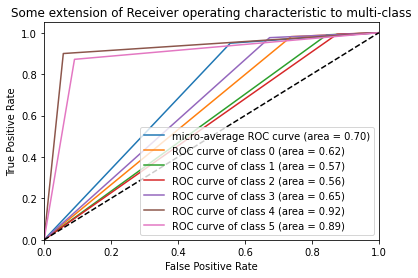

ROC curve for 512 tokens


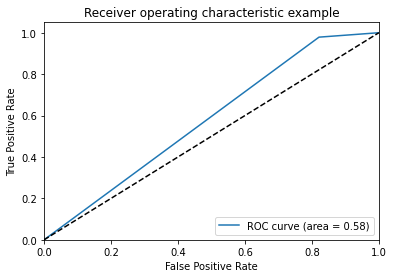

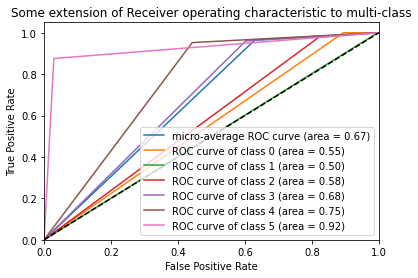

In [24]:
utils.draw_rocs(y_preds, Ys, classes, threshold, model_names)

In [25]:
utils.print_classification_reports(y_preds, Ys, classes, threshold, model_names)

Classification for 50 Tokens  : 
                       precision    recall  f1-score   support

    Computer Science       0.32      0.99      0.48       473
             Physics       0.18      0.98      0.31       292
         Mathematics       0.20      0.99      0.34       280
          Statistics       0.26      0.99      0.41       377
Quantitative Biology       0.81      0.94      0.87       587
Quantitative Finance       0.00      0.00      0.00       249

           micro avg       0.30      0.86      0.44      2258
           macro avg       0.30      0.81      0.40      2258
        weighted avg       0.37      0.86      0.48      2258
         samples avg       0.37      0.85      0.48      2258

Classification for 100 tokens  : 
                       precision    recall  f1-score   support

    Computer Science       0.29      0.99      0.45       473
             Physics       0.21      1.00      0.34       292
         Mathematics       0.17      0.99      0.29       2

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Conclusion
The experiment has shown that the sweet spot is 200 tokens for our dataset. Using a bigger number would mean that we would need more memory for training and inferencing and that is not always ideal. then there is always a point of diminishing return where making token sizer bigger does not add much value.

Taking both into cases into account and within the bounds of time and computer, further experiments will be using 200 as the max length for the bert tokenizer.